# Predicting Social Network Influencers

In this notebook, we predict social network influencers based on the following pieces of data for each pair of users and known influencer of each pair:
- Follower counts
- Following counts
- Listed count
- Mentions received
- Retweets received
- Mentions sent
- Retweets sent
- Posts
- Network feature 1 
- Network feature 2 
- Network feature 3

The dataset originally came from here: 
https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network


## 1. Load the data

To load the data, we will use a very useful data package called Pandas.

In [214]:
import pandas as pd

data = pd.read_csv('train.csv')
display(data.head(n = 5))

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [215]:
# create Choice and features data sets
choice_raw = data['Choice']
features_raw = data.drop('Choice', axis = 1)


## 2. Visualize the data


### 2.1 Follower Count


In [216]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points(data, feature1, feature2):
    X = np.array(data[[feature1,feature2]])
    #print X
    y = choice_raw
    #print y
    A_is_more_influencial = X[np.argwhere(y==1)]
    B_is_more_influencial = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in A_is_more_influencial], [s[0][1] for s in A_is_more_influencial], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in B_is_more_influencial], [s[0][1] for s in B_is_more_influencial], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

,A_follower_count,B_follower_count
0,228,34463
1,21591,39262
2,7310,3622
3,20,19562
4,45589,7554


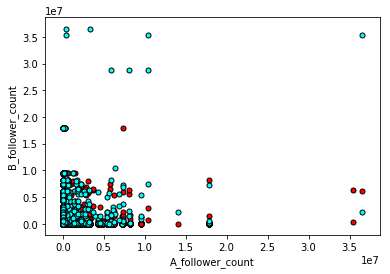

In [217]:
explore_features = ['A_follower_count','B_follower_count']
explore_data = data[explore_features]
#explore_data[explore_features] = data[explore_features]

display(explore_data.head(n = 5))

plot_points(explore_data, 'A_follower_count','B_follower_count')
plt.show()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,5.433722,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,9.980078,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,8.897135,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,3.044522,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,10.727444,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


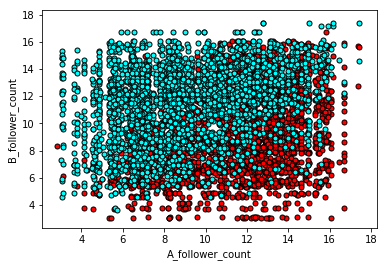

In [218]:
skewed = ['A_follower_count', 'B_follower_count']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Show an example of a record with scaling applied
display(features_log_transformed.head(n = 5))

plot_points(features_log_transformed, 'A_follower_count','B_follower_count')
plt.show()

### 2.1 Following Count


,A_following_count,B_following_count
0,302,29808
1,1179,848
2,1215,482
3,7,17637
4,862,1711


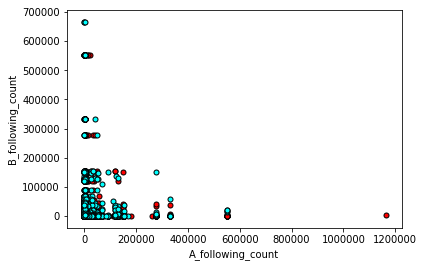

In [219]:
explore_features = ['A_following_count','B_following_count']
explore_data = data[explore_features]
#explore_data[explore_features] = data[explore_features]

display(explore_data.head(n = 5))

plot_points(explore_data, 'A_following_count','B_following_count')
plt.show()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,5.433722,5.713733,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,10.302566,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,9.980078,7.073270,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,6.744059,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,8.897135,7.103322,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,6.180017,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,3.044522,2.079442,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,9.777811,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,10.727444,6.760415,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,7.445418,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


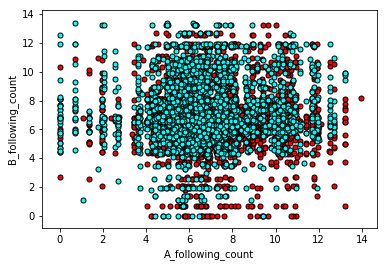

In [220]:
skewed = ['A_following_count', 'B_following_count']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Show an example of a record with scaling applied
display(features_log_transformed.head(n = 5))

plot_points(features_log_transformed, 'A_following_count','B_following_count')
plt.show()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,5.433722,0.409031,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,0.768474,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,9.980078,0.506357,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,0.503043,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,8.897135,0.508508,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,0.460971,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,3.044522,0.148862,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,0.729332,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,10.727444,0.483960,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,0.555358,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


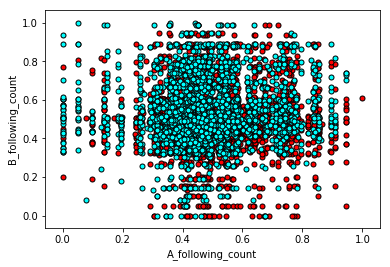

In [221]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

scaler = MinMaxScaler() # default=(0, 1)
numerical = ['A_following_count', 'B_following_count']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

plot_points(features_log_minmax_transform, 'A_following_count','B_following_count')
plt.show()

### 2.3 Relation Between Followers and Following


,A_follower_count,A_following_count
0,228,302
1,21591,1179
2,7310,1215
3,20,7
4,45589,862


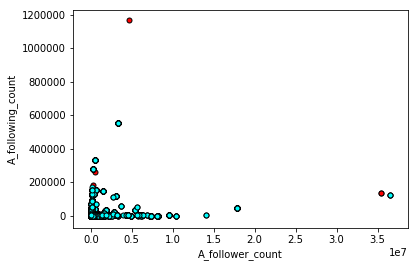

In [222]:
explore_features = ['A_follower_count', 'A_following_count']
explore_data = data[explore_features]
#explore_data[explore_features] = data[explore_features]

display(explore_data.head(n = 5))

plot_points(explore_data, 'A_follower_count', 'A_following_count')
plt.show()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0.178352,0.409031,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,0.768474,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0.490156,0.506357,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,0.503043,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0.415884,0.508508,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,0.460971,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0.014492,0.148862,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,0.729332,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,0.541413,0.483960,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,0.555358,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


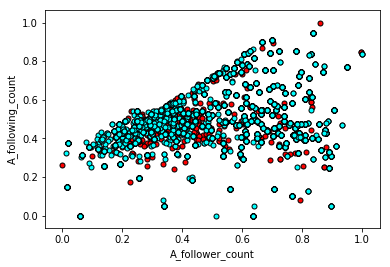

In [223]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

scaler = MinMaxScaler() # default=(0, 1)
numerical = ['A_follower_count', 'A_following_count']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

plot_points(features_log_minmax_transform, 'A_follower_count','A_following_count')
plt.show()

Çok az kişiyi takip edenlerin çok kişi tarafından takip edildiği durumlar oluyor ancak tersi mümkün değil.

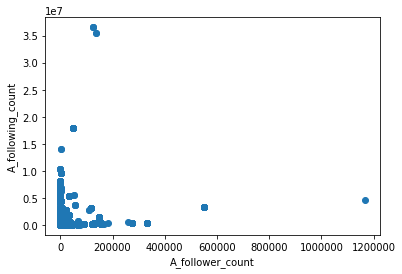

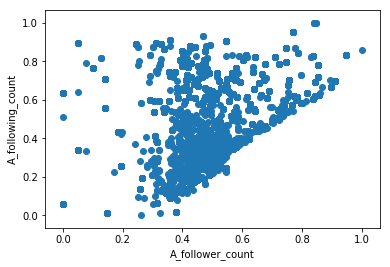

In [224]:
plt.scatter(np.array(data[['A_following_count']]), np.array(data[['A_follower_count']]))
plt.xlabel('A_follower_count')
plt.ylabel('A_following_count')
plt.show()

plt.scatter(features_log_minmax_transform['A_following_count'], features_log_minmax_transform['A_follower_count'])
plt.xlabel('A_follower_count')
plt.ylabel('A_following_count')
plt.show()


## 3. Creating Train & Test Data


Validation data

In [229]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transform, choice_raw, test_size = 0.2, random_state = 0)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4400 samples.
Testing set has 1100 samples.


## 4. Creating a Training and Predcting Pipeline


To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section. In the code block below, you will need to implement the following:
Import fbeta_score and accuracy_score from sklearn.metrics.
Fit the learner to the sampled training data and record the training time.
Perform predictions on the test data X_test, and also on the first 300 training points X_train[:300].
Record the total prediction time.
Calculate the accuracy score for both the training subset and testing set.
Calculate the F-score for both the training subset and testing set.
Make sure that you set the beta parameter!

In [225]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[1:sample_size], y_train[1:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
    
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[1:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
    
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[1:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[1:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
    
    '''
    print "{}-{}-{:.2f}-{:.2f}-{:.2f}-{:.2f}-{:.2f}-{:.2f}".format(
        learner.__class__.__name__,
        sample_size,
        results['acc_test'],
        results['f_test'],
        results['acc_train'],
        results['f_train'],
        results['train_time'],
        results['pred_time']
    )
    '''
    
    #Success
    print "{} trained on {} samples".format(
        learner.__class__.__name__,
        sample_size
    )     
    
    # Return the results
    return results

## 3. Initial Model


In the code cell, you will need to implement the following:
Import the three supervised learning models you've discussed in the previous section.
Initialize the three models and store them in 'clf_A', 'clf_B', and 'clf_C'.
Use a 'random_state' for each model you use, if provided.
Note: Use the default settings for each model — you will tune one specific model in a later section.
Calculate the number of records equal to 1%, 10%, and 100% of the training data.
Store those values in 'samples_1', 'samples_10', and 'samples_100' respectively.
Note: Depending on which algorithms you chose, the following implementation may take some time to run!

In [197]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 0)#Decision Tree Classifier
clf_B = SVC(random_state = 0)#Support Vector Classification
clf_C = LogisticRegression(random_state = 0)#Support Vector Classification

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
size_of_train_data = len(data)
samples_100 = size_of_train_data
samples_10  = int(size_of_train_data*0.1)
samples_1   = int(size_of_train_data*0.01)

# If accuracy, f-score and time are printed in the function
# print "Algorith-Sample Size-Test Accuracy-Test FScore-Train Accuracy-Train FScore-Train Time-Prediction Time"  
    
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

NameError: name 'X_train' is not defined

# BURADAYIM

follower_count


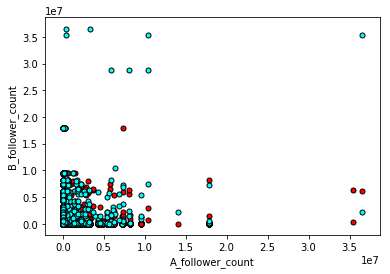

following_count


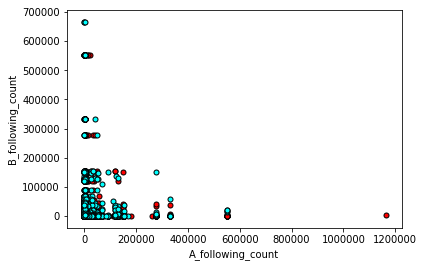

listed_count


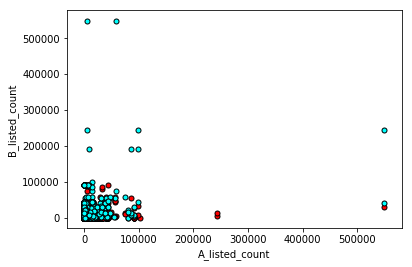

mentions_received


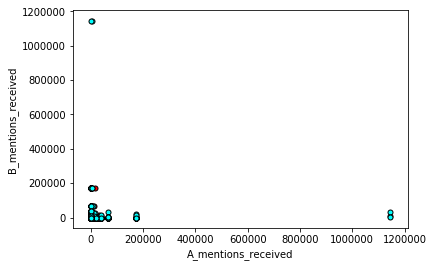

retweets_received


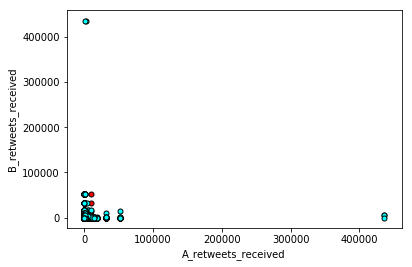

mentions_sent


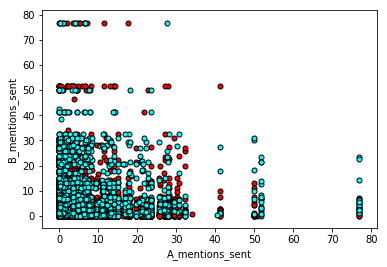

retweets_sent


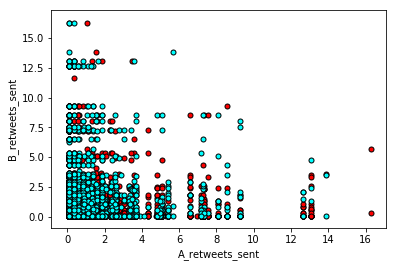

posts


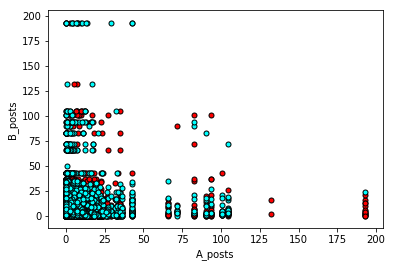

network_feature_1


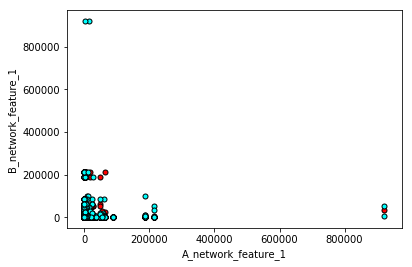

network_feature_2


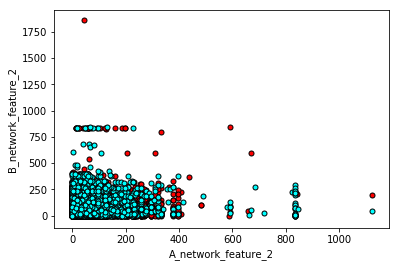

network_feature_3


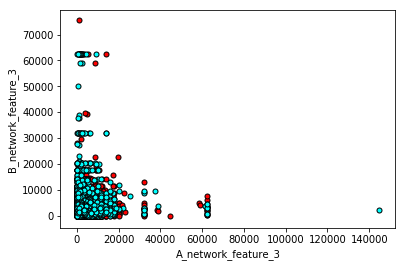

In [152]:
def new_plot_points(data, feature1, feature2, output):
    X = np.array(data[[feature1,feature2]])
    y = np.array(data[[output]])
    A_is_more_influencial = X[np.argwhere(y==1)]
    B_is_more_influencial = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in A_is_more_influencial], [s[0][1] for s in A_is_more_influencial], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in B_is_more_influencial], [s[0][1] for s in B_is_more_influencial], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    
new_explore_features = ['follower_count', 'following_count', 'listed_count', 'mentions_received',
                        'retweets_received', 'mentions_sent', 'retweets_sent', 'posts', 
                        'network_feature_1', 'network_feature_2', 'network_feature_3'
                       ]

for feature_item in new_explore_features:
    print(feature_item)
    new_plot_points(data, 'A_' + feature_item, 'B_' + feature_item, 'Choice')
    plt.show()

In [154]:
import matplotlib.pyplot as plt
import plotly.plotly as py

y = np.array(data[['A_follower_count']])
x = np.array(data[['Choice']])
width = 1/1.5
plt.bar(x, y, width, color="blue")


fig = plt.gcf()



ImportError: No module named plotly.plotly

## 3. Transforming the data


### 3.1 Transforming Skewed Continuous Features

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.

For highly-skewed feature distributions, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In [83]:
skewed = ['A_follower_count', 'B_follower_count', 'A_following_count', 'B_following_count']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Show an example of a record with scaling applied
display(features_log_transformed.head(n = 5))

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,5.433722,5.713733,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,10.302566,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,9.980078,7.073270,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,6.744059,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,8.897135,7.103322,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,6.180017,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,3.044522,2.079442,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,9.777811,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,10.727444,6.760415,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,7.445418,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


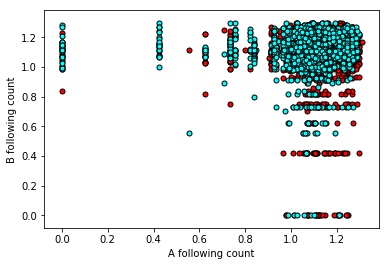

In [84]:
plot_points(features_log_minmax_transform, choice_raw, 'A_follower_count', 'B_follower_count', 'A following count', 'B following count')
plt.show()

In [ ]:
new_explore_features = ['follower_count', 'following_count', 'listed_count', 'mentions_received',
                        'retweets_received', 'mentions_sent', 'retweets_sent', 'posts', 
                        'network_feature_1', 'network_feature_2', 'network_feature_3'
                       ]

for feature_item in new_explore_features:
    print(feature_item)
    new_plot_points(data, 'A_' + feature_item, 'B_' + feature_item, 'Choice')
    plt.show()

Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

In [77]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

scaler = MinMaxScaler() # default=(0, 1)
numerical = ['A_follower_count', 'B_follower_count']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0.389450,1.066143,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,1.231110,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0.723546,1.127704,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,1.114133,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0.662967,1.128907,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,1.089000,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0.044162,0.753653,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,1.217133,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,0.761011,1.114825,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,1.142190,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [35]:
choice_raw = data['Choice']
features_raw = data.drop('Choice', axis = 1)

skewed = ['A_follower_count', 'B_follower_count']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Show an example of a record with scaling applied
display(features_log_transformed.head(n = 5))

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,8.897135,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
1,3.044522,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
2,10.727444,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
3,12.562824,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,...,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
4,12.562824,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,...,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186


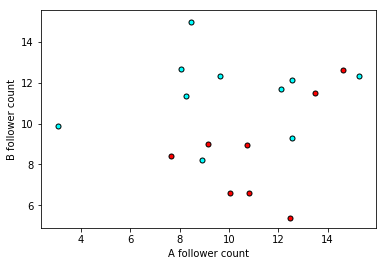

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def plot_points(data):
    X = np.array(features_log_transformed[['A_follower_count','B_follower_count']])
    y = np.array(choice_raw)
    A_is_more_influencial = X[np.argwhere(y==1)]  
    B_is_more_influencial = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in A_is_more_influencial], [s[0][1] for s in A_is_more_influencial], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in B_is_more_influencial], [s[0][1] for s in B_is_more_influencial], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('A follower count')
    plt.ylabel('B follower count')
plot_points(data)
plt.show()

In [23]:
import matplotlib.pyplot as pl

def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['A_follower_count','B_follower_count']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel('Number of Followers')
        ax.set_ylabel('Choice')
        ax.set_ylim((0, 1))
        ax.set_yticks([0, 50, 100, 150, 200])
        ax.set_yticklabels([0, 50, 100, 150, ">200"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

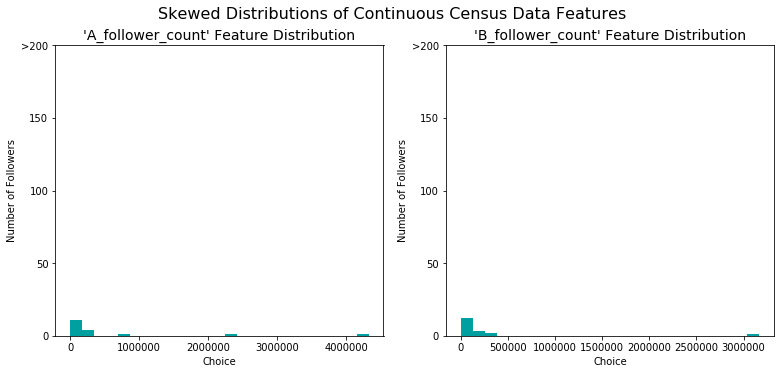

In [24]:
# Load the Census dataset
choice_raw = data['Choice']
features_raw = data.drop('Choice', axis = 1)

# Visualize skewed continuous features of original data
distribution(data)

In [ ]:
# Log-transform the skewed features
skewed = ['A_follower_count','B_follower_count']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

The data, based on only GRE and GPA scores, doesn't seem very separable. Maybe if we make a plot for each of the ranks, the boundaries will be more clear.

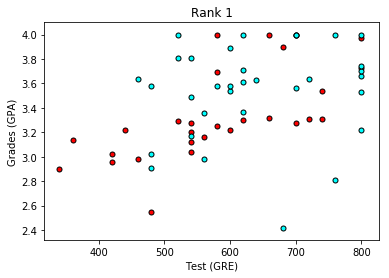

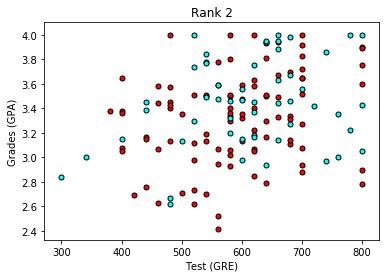

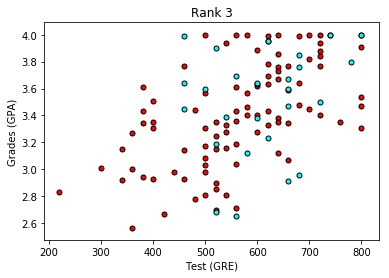

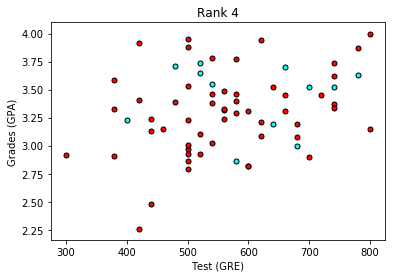

In [4]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()


These plots look a bit more linearly separable, although not completely. But it seems that using a multi-layer perceptron with the rank, gre, and gpa as inputs, may give us a decent solution.

# 2. Process the data
We'll do the following steps to clean up the data for training:
- One-hot encode the rank
- Normalize the gre and the gpa scores, so they'll be in the interval (0,1)
- Split the data into the input X, and the labels y.

In [7]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

ImportError: cannot import name np_utils

In [302]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 7)

Shape of y: (400, 2)

First 10 rows of X
[[ 0.47499999  0.90249997  0.          0.          0.          1.          0.        ]
 [ 0.82499999  0.91750002  0.          0.          0.          1.          0.        ]
 [ 1.          1.          0.          1.          0.          0.          0.        ]
 [ 0.80000001  0.79750001  0.          0.          0.          0.          1.        ]
 [ 0.64999998  0.73250002  0.          0.          0.          0.          1.        ]
 [ 0.94999999  0.75        0.          0.          1.          0.          0.        ]
 [ 0.69999999  0.745       0.          1.          0.          0.          0.        ]
 [ 0.5         0.76999998  0.          0.          1.          0.          0.        ]
 [ 0.67500001  0.84750003  0.          0.          0.          1.          0.        ]
 [ 0.875       0.98000002  0.          0.          1.          0.          0.        ]]

First 10 rows of y
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [

# 3. Split the data into training and testing sets

In [292]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 7)
350 train samples
50 test samples


# 4. Define the model architecture

In [309]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
# Note that filling out the empty rank as "0", gave us an extra column, for "Rank 0" students.
# Thus, our input dimension is 7 instead of 6.
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 130       
Total params: 9,410.0
Trainable params: 9,410.0
Non-trainable params: 0.0
_________________________________________________________________


# 5. Train the model

In [310]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

# 6. Score the model

In [308]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

 32/350 [=>............................] - ETA: 2s
 Training Accuracy: 0.719999999659
32/50 [==================>...........] - ETA: 0s
 Testing Accuracy: 0.679999997616


# 7. Play with parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.

It's your turn to play with parameters! Can you improve the accuracy? The following are other suggestions for these parameters. We'll learn the definitions later in the class:
- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada